<a href="https://colab.research.google.com/github/gopaps/MachineLearning/blob/main/week%209/week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM Regression CreditDataset.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from google.colab import drive

In [14]:
# Mengintegrasikan Google Drive dengan Google Colab untuk mengakses dataset
# Pastikan dataset telah diunggah ke Google Drive sebelum digunakan
# Integrasi ini memungkinkan dataset di Google Drive digunakan langsung dalam analisis
print("Menyambungkan Google Drive ke Google Colab...")
from google.colab import drive
drive.mount('/content/drive')

Menyambungkan Google Drive ke Google Colab...
Mounted at /content/drive


In [15]:
# Mengimpor dataset "CreditDataset.csv" yang tersimpan di Google Drive
# Pastikan path file sesuai dengan lokasi file di dalam Google Drive Anda
data = '/content/drive/My Drive/dataset/CreditDataset.csv'  # Lokasi file dataset
df = pd.read_csv(data)  # Membaca file CSV dan menyimpannya dalam DataFrame


In [16]:
# Menampilkan lima baris pertama dari dataset untuk memeriksa isi dan struktur data
# Ini membantu memahami format data serta kolom yang tersedia dalam dataset
print("Menampilkan sampel data:")
print(df.head())  # Menampilkan lima baris pertama dari DataFrame


Menampilkan sampel data:
    x1  x2   x3   x4    x5   x6   x7  x8   x9   x10  ...   x12 x13   x14  \
0  A11   6  A34  A43  1169  A65  A75   4  A93  A101  ...  A121  67  A143   
1  A12  48  A32  A43  5951  A61  A73   2  A92  A101  ...  A121  22  A143   
2  A14  12  A34  A46  2096  A61  A74   2  A93  A101  ...  A121  49  A143   
3  A11  42  A32  A42  7882  A61  A74   2  A93  A103  ...  A122  45  A143   
4  A11  24  A33  A40  4870  A61  A73   3  A93  A101  ...  A124  53  A143   

    x15 x16   x17 x18   x19   x20 Class  
0  A152   2  A173   1  A192  A201     1  
1  A152   1  A173   1  A191  A201     2  
2  A152   1  A172   2  A191  A201     1  
3  A153   1  A173   2  A191  A201     1  
4  A153   2  A173   2  A191  A201     2  

[5 rows x 21 columns]


In [17]:
# Memeriksa keberadaan nilai kosong dan mendapatkan informasi umum tentang dataset
# Informasi ini mencakup jumlah baris, kolom, tipe data, dan jumlah nilai non-null
print("Memeriksa informasi dataset dan keberadaan nilai kosong...")
print(df.info())  # Menampilkan ringkasan informasi tentang DataFrame


Memeriksa informasi dataset dan keberadaan nilai kosong...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      1000 non-null   object
 1   x2      1000 non-null   int64 
 2   x3      1000 non-null   object
 3   x4      1000 non-null   object
 4   x5      1000 non-null   int64 
 5   x6      1000 non-null   object
 6   x7      1000 non-null   object
 7   x8      1000 non-null   int64 
 8   x9      1000 non-null   object
 9   x10     1000 non-null   object
 10  x11     1000 non-null   int64 
 11  x12     1000 non-null   object
 12  x13     1000 non-null   int64 
 13  x14     1000 non-null   object
 14  x15     1000 non-null   object
 15  x16     1000 non-null   int64 
 16  x17     1000 non-null   object
 17  x18     1000 non-null   int64 
 18  x19     1000 non-null   object
 19  x20     1000 non-null   object
 20  Class   1000 non-null   int64 
dtypes:

In [18]:
# Menghapus baris yang mengandung nilai kosong (null) untuk membersihkan dataset
# Langkah ini dilakukan agar data yang hilang tidak memengaruhi analisis atau performa model
print("Membersihkan dataset dengan menghapus baris yang memiliki nilai null...")
df = df.dropna()  # Menghapus semua baris yang mengandung nilai null


Membersihkan dataset dengan menghapus baris yang memiliki nilai null...


In [20]:
# Memisahkan dataset menjadi fitur (X) dan target (y)
# X berisi semua kolom kecuali kolom 'Class', yang menjadi target prediksi
X = df.drop(columns=['Class'])  # Menghapus kolom 'Class' dari dataset untuk digunakan sebagai fitur
y = df['Class']  # Menjadikan kolom 'Class' sebagai target


In [21]:
# Memisahkan kolom bertipe kategorikal dan numerik dalam dataset
categorical_features = X.select_dtypes(include=['object']).columns  # Mendapatkan kolom bertipe kategorikal
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns  # Mendapatkan kolom bertipe numerik

# Mengonversi fitur kategorikal menjadi numerik menggunakan LabelEncoder
# LabelEncoder digunakan karena OneHotEncoder tidak selalu ideal untuk model seperti SVR
print("Mengonversi fitur kategorikal ke numerik menggunakan LabelEncoder...")
label_encoders = {}  # Menyimpan encoder untuk setiap kolom
for col in categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Mengonversi kategori ke angka
    label_encoders[col] = le  # Menyimpan encoder untuk keperluan dekripsi atau validasi di masa depan

# Menstandarisasi fitur numerik agar memiliki distribusi seragam
print("Melakukan standardisasi fitur numerik...")
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])  # Menstandarkan data numerik


Mengonversi fitur kategorikal ke numerik menggunakan LabelEncoder...
Melakukan standardisasi fitur numerik...


In [22]:
# Membagi dataset menjadi data latih (train) dan data uji (test)
# Sebanyak 80% data digunakan untuk melatih model dan 20% sisanya untuk menguji performa model
print("Memisahkan dataset menjadi data latih dan data uji...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Memisahkan dataset menjadi data latih dan data uji...


In [23]:
# Membuat model SVR (Support Vector Regression) dengan kernel RBF
# Melatih model menggunakan data latih (train)
print("Membangun model SVR dan melatihnya...")
svm_regressor = SVR(kernel='rbf')  # Menggunakan kernel Radial Basis Function (RBF)
svm_regressor.fit(X_train, y_train)  # Melatih model dengan data latih

# Melakukan prediksi menggunakan data uji (test)
print("Melakukan prediksi menggunakan data uji...")
y_pred = svm_regressor.predict(X_test)  # Menghasilkan prediksi target untuk data uji


Membangun model SVR dan melatihnya...
Melakukan prediksi menggunakan data uji...


In [24]:
# Menghitung metrik evaluasi untuk model regresi
# Metrik yang digunakan: Mean Squared Error (MSE), Mean Absolute Error (MAE), dan R-Squared
print("Evaluasi model sedang dilakukan...")
mse = mean_squared_error(y_test, y_pred)  # Menghitung Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Menghitung Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # Menghitung nilai R-Squared

# Menampilkan hasil evaluasi
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-Squared:", r2)


Evaluasi model sedang dilakukan...
Mean Squared Error (MSE): 0.16564033566102623
Mean Absolute Error (MAE): 0.2903990632076922
R-Squared: 0.20355650601742403


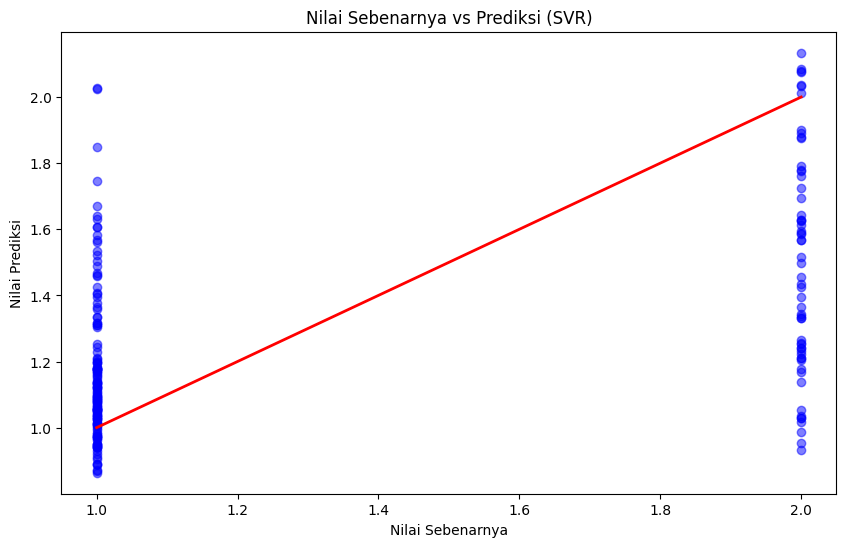

In [25]:
# Membuat visualisasi hasil prediksi dibandingkan dengan nilai sebenarnya
# Scatter plot menunjukkan hubungan antara nilai prediksi dan nilai sebenarnya
plt.figure(figsize=(10, 6))  # Mengatur ukuran figure untuk plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Membuat scatter plot nilai prediksi vs nilai sebenarnya
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Garis diagonal ideal
plt.xlabel('Nilai Sebenarnya')  # Memberi label pada sumbu X
plt.ylabel('Nilai Prediksi')  # Memberi label pada sumbu Y
plt.title('Nilai Sebenarnya vs Prediksi (SVR)')  # Menambahkan judul plot
plt.show()  # Menampilkan plot


# SVM Classification MaterialStrength.csv

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [28]:
# Mengintegrasikan Google Drive dengan Google Colab untuk mengakses dataset
# Pastikan dataset telah diunggah ke Google Drive sebelum digunakan
# Integrasi ini memungkinkan dataset di Google Drive digunakan langsung dalam analisis
print("Menyambungkan Google Drive ke Google Colab...")
from google.colab import drive
drive.mount('/content/drive')

Menyambungkan Google Drive ke Google Colab...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# Mengimpor dataset "CreditDataset.csv" yang tersimpan di Google Drive
# Pastikan path file sesuai dengan lokasi file di dalam Google Drive Anda
data = '/content/drive/My Drive/dataset/MaterialStrength.csv'  # Lokasi file dataset
df = pd.read_csv(data)  # Membaca file CSV dan menyimpannya dalam DataFrame


In [30]:
# Menampilkan lima baris pertama dari dataset untuk memeriksa isi dan struktur data
# Ini membantu memahami format data serta kolom yang tersedia dalam dataset
print("Menampilkan sampel data:")
print(df.head())  # Menampilkan lima baris pertama dari DataFrame


Menampilkan sampel data:
      x1     x2   x3     x4   x5      x6     x7   x8        x9    x10  \
0  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28  0.300000  540.0   
1  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28  0.300000  540.0   
2  332.5  142.5  0.0  228.0  0.0   932.0  594.0  270  0.685714  475.0   
3  332.5  142.5  0.0  228.0  0.0   932.0  594.0  365  0.685714  475.0   
4  198.6  132.4  0.0  192.0  0.0   978.4  825.5  360  0.966767  331.0   

        x11  x12       x13  x14  x15  target_feature  
0  1.538462    1  0.350044  YEs   NO           79.99  
1  1.560651    1  0.452416  yES  nOO           61.89  
2  1.569024    0  6.704743  yEs   NO           40.27  
3  1.569024    0  8.891596  yes  NOO           41.05  
4  1.185221    0  8.126411  YeS   no           44.30  


In [31]:
# Memeriksa keberadaan nilai kosong dan mendapatkan informasi umum tentang dataset
# Informasi ini mencakup jumlah baris, kolom, tipe data, dan jumlah nilai non-null
print("Memeriksa informasi dataset dan keberadaan nilai kosong...")
print(df.info())  # Menampilkan ringkasan informasi tentang DataFrame


Memeriksa informasi dataset dan keberadaan nilai kosong...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x1              1030 non-null   float64
 1   x2              1030 non-null   float64
 2   x3              1030 non-null   float64
 3   x4              1030 non-null   float64
 4   x5              1030 non-null   float64
 5   x6              1030 non-null   float64
 6   x7              1030 non-null   float64
 7   x8              1030 non-null   int64  
 8   x9              1030 non-null   float64
 9   x10             1030 non-null   float64
 10  x11             1030 non-null   float64
 11  x12             1030 non-null   int64  
 12  x13             1030 non-null   float64
 13  x14             1030 non-null   object 
 14  x15             1030 non-null   object 
 15  target_feature  1030 non-null   float64
dtypes: float64(12), int

In [32]:
# Menghapus baris yang mengandung nilai kosong (null) untuk membersihkan dataset
# Langkah ini dilakukan agar data yang hilang tidak memengaruhi analisis atau performa model
print("Membersihkan dataset dengan menghapus baris yang memiliki nilai null...")
df = df.dropna()  # Menghapus semua baris yang mengandung nilai null


Membersihkan dataset dengan menghapus baris yang memiliki nilai null...


In [33]:
# Memisahkan dataset menjadi fitur (X) dan target (y)
# Fitur (X) adalah semua kolom kecuali kolom terakhir
# Target (y) adalah kolom terakhir dalam dataset
X = df.iloc[:, :-1]  # Memilih semua kolom kecuali kolom terakhir sebagai fitur
y = df.iloc[:, -1]   # Memilih kolom terakhir sebagai target


In [34]:
# Mengubah target menjadi tipe kategorikal jika berupa nilai kontinu
# Hal ini dilakukan agar target sesuai untuk model klasifikasi
y = pd.cut(y, bins=2, labels=[0, 1]) if y.dtype in ['int64', 'float64'] else y

# Mengidentifikasi fitur kategorikal dan numerik dalam dataset
categorical_features = X.select_dtypes(include=['object']).columns  # Kolom bertipe kategorikal
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns  # Kolom bertipe numerik

# Mengonversi fitur kategorikal menjadi numerik menggunakan LabelEncoder
print("Mengonversi fitur kategorikal ke numerik...")
label_encoders = {}  # Untuk menyimpan encoder setiap kolom
for col in categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Mengubah nilai kategori ke angka
    label_encoders[col] = le  # Menyimpan encoder untuk referensi ke depan

# Menstandarisasi fitur numerik untuk menyamakan skala
print("Menstandarisasi fitur numerik...")
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])  # Menstandarkan nilai numerik


Mengonversi fitur kategorikal ke numerik...
Menstandarisasi fitur numerik...


In [35]:
# Membagi dataset menjadi data latih (train) dan data uji (test)
# 80% data digunakan untuk melatih model, dan 20% data untuk menguji performa model
print("Membagi dataset menjadi data latih dan data uji...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Membagi dataset menjadi data latih dan data uji...


In [36]:
# Membuat model klasifikasi menggunakan Support Vector Classification (SVC) dengan kernel RBF
# Melatih model menggunakan data latih (train)
print("Membangun model SVC dan melatihnya...")
svm_classifier = SVC(kernel='rbf', probability=True)  # Menggunakan kernel Radial Basis Function (RBF)
svm_classifier.fit(X_train, y_train)  # Melatih model dengan data latih

# Melakukan prediksi menggunakan data uji (test)
print("Melakukan prediksi pada data uji...")
y_pred = svm_classifier.predict(X_test)  # Memprediksi target untuk data uji


Membangun model SVC dan melatihnya...
Melakukan prediksi pada data uji...


In [37]:
# Menghitung metrik evaluasi untuk menilai kinerja model klasifikasi
# Metrik yang digunakan: Akurasi, Presisi, Recall, F1 Score, dan AUC
print("Melakukan evaluasi kinerja model...")
accuracy = accuracy_score(y_test, y_pred)  # Menghitung akurasi
precision = precision_score(y_test, y_pred, average='weighted')  # Menghitung presisi (weighted)
recall = recall_score(y_test, y_pred, average='weighted')  # Menghitung recall (weighted)
f1 = f1_score(y_test, y_pred, average='weighted')  # Menghitung F1 Score (weighted)

# Menghitung AUC jika target adalah biner
y_prob = svm_classifier.predict_proba(X_test)[:, 1] if len(np.unique(y)) == 2 else None
auc = roc_auc_score(y_test, y_prob) if y_prob is not None else 'N/A'  # Menghitung AUC jika memungkinkan

# Menampilkan hasil evaluasi
print("Akurasi:", accuracy)
print("Presisi (weighted):", precision)
print("Recall (weighted):", recall)
print("F1 Score (weighted):", f1)
print("AUC:", auc)


Melakukan evaluasi kinerja model...
Akurasi: 0.8155339805825242
Presisi (weighted): 0.8113089134512831
Recall (weighted): 0.8155339805825242
F1 Score (weighted): 0.812030273260632
AUC: 0.902127659574468


Membuat Confusion Matrix...


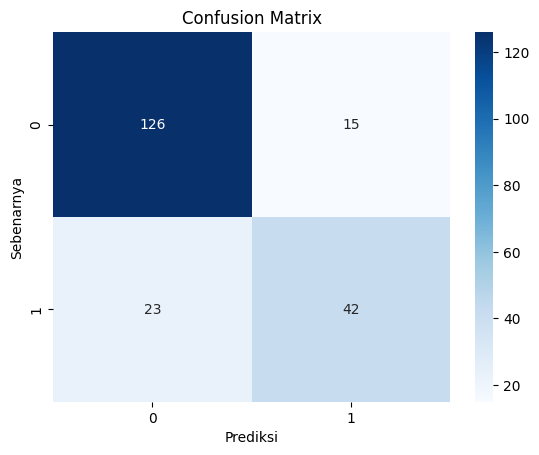

In [38]:
# Membuat Confusion Matrix untuk mengevaluasi performa prediksi model
print("Membuat Confusion Matrix...")
conf_matrix = confusion_matrix(y_test, y_pred)  # Menghitung confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')  # Membuat heatmap untuk visualisasi
plt.xlabel('Prediksi')  # Label sumbu X untuk prediksi
plt.ylabel('Sebenarnya')  # Label sumbu Y untuk nilai sebenarnya
plt.title('Confusion Matrix')  # Judul plot
plt.show()  # Menampilkan plot


Membuat ROC Curve...


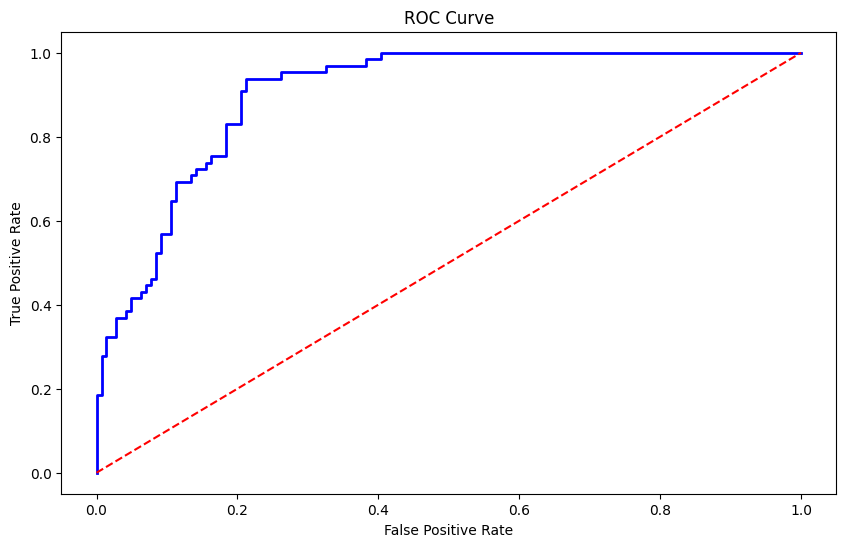

In [39]:
# Membuat ROC Curve untuk memvisualisasikan performa model jika klasifikasi biner
if y_prob is not None:  # ROC Curve hanya dibuat jika target bersifat biner
    print("Membuat ROC Curve...")
    fpr, tpr, _ = roc_curve(y_test, y_prob)  # Menghitung False Positive Rate (FPR) dan True Positive Rate (TPR)
    plt.figure(figsize=(10, 6))  # Mengatur ukuran plot
    plt.plot(fpr, tpr, color='blue', lw=2)  # Membuat kurva ROC
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Menambahkan garis diagonal sebagai baseline
    plt.xlabel('False Positive Rate')  # Label sumbu X
    plt.ylabel('True Positive Rate')  # Label sumbu Y
    plt.title('ROC Curve')  # Judul plot
    plt.show()  # Menampilkan plot
